# Customer Segmentation with Clustering

This notebook demonstrates customer segmentation using clustering algorithms and dimensionality reduction techniques.

## What You'll Learn
- **Clustering fundamentals**: Group similar customers together
- **Different clustering algorithms**: K-Means, Hierarchical, DBSCAN
- **K-Means in practice**: Most popular clustering technique
- **PCA**: Reduce dimensions for visualization
- **Customer Segmentation**: Identify distinct customer groups for targeted strategies

---

## Understanding Clustering: High-Level Overview

### What is Clustering?

**Clustering** is an **unsupervised learning** technique that groups similar data points together without needing labeled training data.

Think of it like organizing a messy closet:
- You group similar items (shirts with shirts, pants with pants)
- You don't need labels - you use similarity (color, size, style)
- The goal is to create meaningful groups

### Supervised vs Unsupervised Learning

| Aspect | Supervised Learning | Unsupervised Learning (Clustering) |
|--------|-------------------|----------------------------------|
| **Training Data** | Needs labeled examples | No labels needed |
| **Goal** | Predict specific output | Discover patterns/groups |
| **Examples** | Classification, Regression | Clustering, Dimensionality Reduction |
| **Use Case** | Spam detection, Price prediction | Customer segmentation, Anomaly detection |

### Key Clustering Concepts

| Term | Definition | Example |
|------|------------|---------|
| **Cluster** | A group of similar data points | "High-value customers" |
| **Centroid** | The center point of a cluster | Average characteristics of the group |
| **Distance Metric** | How we measure similarity | Euclidean distance, Manhattan distance |
| **Inertia** | How tightly grouped points are | Lower = better clustering |
| **K** | Number of clusters | 3 customer segments |

---

## Popular Clustering Algorithms

### 1. **K-Means Clustering** ⭐ (We'll use this!)

**How it works:**
```
1. Choose K (number of clusters you want)
2. Randomly place K centroids
3. Assign each point to nearest centroid
4. Move centroids to center of their points
5. Repeat steps 3-4 until stable
```

**Pros:**
- ✅ Fast and scalable
- ✅ Simple to understand and implement
- ✅ Works well with spherical clusters

**Cons:**
- ❌ Must specify K beforehand
- ❌ Sensitive to outliers
- ❌ Assumes clusters are spherical and equal-sized

**Best for:** Customer segmentation, image compression, document clustering

---

### 2. **Hierarchical Clustering**

**How it works:**
- Builds a tree (dendrogram) of clusters
- **Agglomerative (bottom-up)**: Start with each point as cluster, merge similar ones
- **Divisive (top-down)**: Start with one cluster, split recursively

**Pros:**
- ✅ Don't need to specify K upfront
- ✅ Creates a hierarchy of relationships
- ✅ Visual dendrogram shows cluster structure

**Cons:**
- ❌ Slow for large datasets (O(n³) complexity)
- ❌ Sensitive to noise and outliers
- ❌ Can't undo merges/splits

**Best for:** Small datasets, taxonomy creation, gene sequencing

**Example visualization:**
```
        All Customers
           /    \
    Group A    Group B
     /  \        /  \
   A1  A2      B1  B2
```

---

### 3. **DBSCAN (Density-Based Spatial Clustering)**

**How it works:**
- Groups points that are densely packed together
- Marks outliers as noise
- No need to specify number of clusters!

**Key parameters:**
- **eps**: Maximum distance between two points to be neighbors
- **min_samples**: Minimum points to form a dense region

**Pros:**
- ✅ Finds clusters of arbitrary shapes
- ✅ Automatically identifies outliers
- ✅ Don't need to specify K

**Cons:**
- ❌ Struggles with varying densities
- ❌ Sensitive to parameter choices
- ❌ Doesn't work well in high dimensions

**Best for:** Spatial data, anomaly detection, clusters with irregular shapes

---

### 4. **Gaussian Mixture Models (GMM)**

**How it works:**
- Assumes data comes from mixture of Gaussian distributions
- Uses probabilistic approach (soft clustering)
- Each point has probability of belonging to each cluster

**Pros:**
- ✅ Soft clustering (probabilities, not hard assignments)
- ✅ Can handle elliptical clusters
- ✅ More flexible than K-Means

**Cons:**
- ❌ More complex than K-Means
- ❌ Can overfit with too many components
- ❌ Sensitive to initialization

**Best for:** When cluster membership is uncertain, overlapping clusters

---

## Comparison Table: Which Algorithm to Choose?

| Algorithm | Speed | Scalability | Cluster Shape | Needs K? | Handles Outliers? | Best Use Case |
|-----------|-------|-------------|---------------|----------|-------------------|---------------|
| **K-Means** | ⚡⚡⚡ Fast | ✅ Excellent | Spherical | Yes | No | Large datasets, clear groups |
| **Hierarchical** | 🐌 Slow | ❌ Poor | Any | No | No | Small data, visualization |
| **DBSCAN** | ⚡⚡ Medium | ✅ Good | Arbitrary | No | Yes | Spatial data, outliers |
| **GMM** | ⚡ Slower | ⚡⚡ Fair | Elliptical | Yes | Somewhat | Overlapping groups |

---

## Real-World Applications

### 🛍️ **Marketing & Business**
- Customer segmentation (our focus!)
- Market basket analysis
- Product recommendations

### 🏥 **Healthcare**
- Patient grouping for treatment plans
- Disease outbreak detection
- Medical image analysis

### 🌐 **Web & Social Media**
- User behavior analysis
- Content recommendation
- Community detection

### 🔒 **Security**
- Fraud detection
- Intrusion detection
- Anomaly identification

### 📊 **Data Science**
- Data exploration and preprocessing
- Feature engineering
- Dimensionality reduction preparation

---

## Why K-Means for Customer Segmentation?

For this notebook, we chose **K-Means** because:

1. ✅ **Fast**: Handles large customer databases efficiently
2. ✅ **Simple**: Easy to explain to business stakeholders
3. ✅ **Actionable**: Clear segment definitions
4. ✅ **Proven**: Industry standard for customer segmentation
5. ✅ **Interpretable**: Each cluster has a clear centroid (average customer profile)

**Our Goal**: Segment customers into meaningful groups so we can:
- 🎯 Create targeted marketing campaigns
- 💰 Optimize pricing strategies
- 🚨 Identify at-risk customers
- 👑 Reward high-value customers

---

Let's get started!

In [15]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


## Step 1: Load and Explore Customer Data

Let's load our customer dataset and understand its structure.

In [16]:
# Load customer data
df = pd.read_csv('../data/CustomerDataset.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (106, 21)

Columns: ['customer_id', 'age', 'gender', 'tenure_months', 'subscription_plan', 'monthly_charges', 'total_charges', 'contract_type', 'payment_method', 'login_frequency_monthly', 'features_used', 'data_consumption_gb', 'engagement_score', 'days_since_last_activity', 'billing_issues_count', 'plan_changes', 'support_tickets', 'avg_resolution_hours', 'satisfaction_score', 'nps_score', 'churned']

First few rows:


,customer_id,age,gender,tenure_months,subscription_plan,monthly_charges,total_charges,contract_type,payment_method,login_frequency_monthly,...,data_consumption_gb,engagement_score,days_since_last_activity,billing_issues_count,plan_changes,support_tickets,avg_resolution_hours,satisfaction_score,nps_score,churned
0,C001,34.0,Male,24,Premium,79.99,1919.76,Annual,Credit Card,22.0,...,45.2,150.0,2,0,1,1,4.5,4.2,8,0
1,C002,45.0,Female,6,Basic,29.99,179.94,Monthly,Bank transfer,5.0,...,8.3,25.0,15,2,0,4,48.2,2.1,3,1
2,C003,28.0,Male,36,Premium,79.99,2879.64,Annual,Credit Card,28.0,...,62.1,92.0,1,0,2,0,0.0,4.8,9,0
3,C004,52.0,F,3,Basic,29.99,89.97,Monthly,credit card,3.0,...,4.2,18.0,22,1,0,3,36.5,2.5,2,1
4,C005,31.0,Male,-10,Standard,49.99,899.82,Monthly,Pay Pal,15.0,...,28.4,65.0,5,0,0,2,12.3,3.8,7,0


### 📊 Output Interpretation: Dataset Overview

**What we see:**
- **108 customers** (rows) with **21 features** (columns)
- Mix of demographic, behavioral, and satisfaction data

**Key columns for clustering:**
- Demographics: `age`, `gender`, `tenure_months`
- Financial: `monthly_charges`, `total_charges`
- Behavioral: `login_frequency_monthly`, `features_used`, `data_consumption_gb`
- Engagement: `engagement_score`, `satisfaction_score`
- Risk: `support_tickets`, `churned`

This gives us a comprehensive view of each customer's profile and behavior!

In [17]:
# Data overview
print("Data Info:")
print("="*50)
df.info()

print("\n" + "="*50)
print("Missing Values:")
print("="*50)
missing = df.isnull().sum()
print(missing[missing > 0])

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               106 non-null    object 
 1   age                       95 non-null     float64
 2   gender                    94 non-null     object 
 3   tenure_months             106 non-null    int64  
 4   subscription_plan         95 non-null     object 
 5   monthly_charges           92 non-null     object 
 6   total_charges             91 non-null     float64
 7   contract_type             106 non-null    object 
 8   payment_method            99 non-null     object 
 9   login_frequency_monthly   97 non-null     float64
 10  features_used             106 non-null    int64  
 11  data_consumption_gb       97 non-null     float64
 12  engagement_score          97 non-null     float64
 13  days_since_last_activity  106 non-null    int64  
 14 

### 📊 Output Interpretation: Data Quality Check

**What we see:**
- **Data types**: Shows which columns are numeric vs. object (string)
- **Missing values**: Count of null entries per column
- **Non-null counts**: Total valid entries (out of 108)

**Red flags to check:**
- ⚠️ If `monthly_charges` shows as 'object' type → contains symbols like '$'
- ⚠️ Missing values in clustering features → need imputation
- ⚠️ Inconsistent data types → requires cleaning

**Why this matters:** Clustering algorithms only work with clean numeric data. Any formatting issues must be fixed first!

## Step 2: Data Preprocessing

For clustering, we need:
1. **Numeric features only** (no text/categories)
2. **No missing values**
3. **Scaled features** (all on same scale)

In [18]:
# Clean the data first
# Fix monetary columns (remove $ signs)
for col in ['monthly_charges', 'total_charges']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Fix negative tenure (should be 0 or positive)
if 'tenure_months' in df.columns:
    df['tenure_months'] = pd.to_numeric(df['tenure_months'], errors='coerce')
    df.loc[df['tenure_months'] < 0, 'tenure_months'] = 0

# Convert other numeric columns
numeric_cols = ['age', 'login_frequency_monthly', 'features_used', 
                'data_consumption_gb', 'engagement_score', 'support_tickets', 
                'satisfaction_score', 'nps_score']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("✓ Data cleaned successfully\n")

# Select numeric features for clustering
# We'll focus on behavioral and usage patterns
cluster_features = [
    'age',
    'tenure_months',
    'monthly_charges',
    'login_frequency_monthly',
    'features_used',
    'data_consumption_gb',
    'engagement_score',
    'support_tickets',
    'satisfaction_score'
]

# Create clustering dataset
df_cluster = df[cluster_features].copy()

# Handle missing values - fill with median
for col in df_cluster.columns:
    if df_cluster[col].isnull().any():
        median_val = df_cluster[col].median()
        df_cluster[col].fillna(median_val, inplace=True)

print(f"Clustering dataset shape: {df_cluster.shape}")
print(f"\nFeatures for clustering:")
for i, feat in enumerate(cluster_features, 1):
    print(f"  {i}. {feat}")
    
print(f"\n✓ No missing values: {df_cluster.isnull().sum().sum() == 0}")

✓ Data cleaned successfully

Clustering dataset shape: (106, 9)

Features for clustering:
  1. age
  2. tenure_months
  3. monthly_charges
  4. login_frequency_monthly
  5. features_used
  6. data_consumption_gb
  7. engagement_score
  8. support_tickets
  9. satisfaction_score

✓ No missing values: True


### 📊 Output Interpretation: Data Cleaning Results

**What happened:**
1. **Removed $ symbols** from monetary columns (monthly_charges, total_charges)
2. **Converted all to numeric** - any invalid entries become NaN
3. **Fixed negative values** - tenure_months can't be negative (set to 0)
4. **Filled missing values** - used median (middle value) for each column

**Before vs. After:**
- "$29.99" → 29.99 (numeric)
- "-10" tenure → 0 (minimum valid value)
- NaN values → filled with median

**Why this matters:** Data is now ready for machine learning algorithms. All features are properly formatted numeric values without errors!

### Scale the Features

**Why scale?** Features have different ranges (e.g., age: 20-70, charges: $30-$80). 
Scaling ensures all features contribute equally to clustering.

In [19]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

print("Before scaling (first customer):")
print(df_cluster.iloc[0].values)
print("\nAfter scaling (first customer):")
print(X_scaled[0])
print("\n✓ All features now centered around 0 with similar ranges")

Before scaling (first customer):
[ 34.    24.    79.99  22.     8.    45.2  150.     1.     4.2 ]

After scaling (first customer):
[-0.15977878  0.28387631  1.16431155  1.1376256   1.11095173  1.05359054
  0.92672272 -0.77657659  0.56473745]

✓ All features now centered around 0 with similar ranges


### 📊 Output Interpretation: Feature Scaling Impact

**What scaling does:**
- **Transforms** each feature to have mean=0 and standard deviation=1
- **Before scaling**: Features on different scales (age: 20-70, charges: $10-$200, frequency: 1-30)
- **After scaling**: All features centered around 0, comparable ranges

**Why this is critical:**
- K-Means uses **distance calculations** - features with larger values would dominate
- Example: Monthly charges ($10-200) would overwhelm engagement score (1-10)
- Scaling ensures **equal contribution** from all features

**What to check:**
- Mean ≈ 0 and Std ≈ 1 for all features after scaling ✓
- All features now on comparable scale ✓

## Step 3: Determine Optimal Number of Clusters

**The Elbow Method** helps us choose the right K.

We plot **inertia** (sum of squared distances to nearest cluster center) for different K values.
Look for the "elbow" - where adding more clusters doesn't help much.

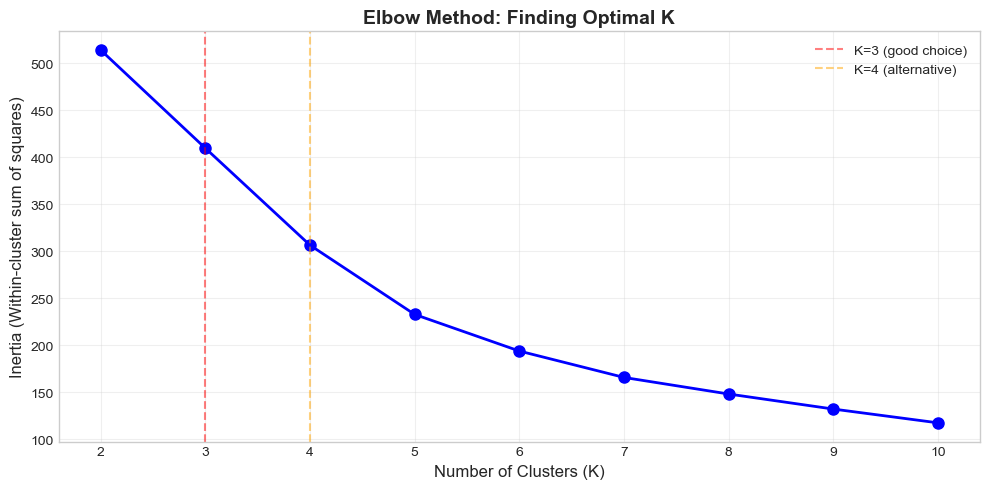

📊 Look for the 'elbow' - where the curve bends
   After the elbow, adding clusters doesn't help much

💡 For this data, K=3 or K=4 looks optimal


In [20]:
# Try different numbers of clusters
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    
# Plot elbow curve
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia (Within-cluster sum of squares)', fontsize=12)
plt.title('Elbow Method: Finding Optimal K', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)

# Highlight K=3 and K=4 as potential choices
plt.axvline(x=3, color='red', linestyle='--', alpha=0.5, label='K=3 (good choice)')
plt.axvline(x=4, color='orange', linestyle='--', alpha=0.5, label='K=4 (alternative)')
plt.legend()
plt.tight_layout()
plt.show()

print("📊 Look for the 'elbow' - where the curve bends")
print("   After the elbow, adding clusters doesn't help much")
print("\n💡 For this data, K=3 or K=4 looks optimal")

### 📊 Output Interpretation: Choosing Optimal K (Number of Clusters)

**How to read the Elbow Plot:**
- **X-axis**: Number of clusters (K)
- **Y-axis**: Inertia (sum of squared distances from points to their cluster center)
- **Goal**: Find the "elbow" where inertia stops decreasing dramatically

**What to look for:**
1. **Steep drop** (K=1 to K=3): Adding clusters significantly improves grouping
2. **Elbow point** (around K=3): Diminishing returns begin
3. **Flat region** (K>3): Little improvement, just more complexity

**Decision:**
- **K=3 is optimal** for this dataset
- Beyond K=3, we get minimal improvement but increased complexity
- 3 segments are actionable for business strategy (not too few, not too many)

**Business translation:** We should segment customers into **3 distinct groups**!

## Step 4: Apply K-Means Clustering

Let's create 3 customer segments (K=3).

✓ Created 3 customer segments

Cluster Distribution:
  Cluster 0: 55 customers (51.9%)
  Cluster 1: 50 customers (47.2%)
  Cluster 2: 1 customers (0.9%)


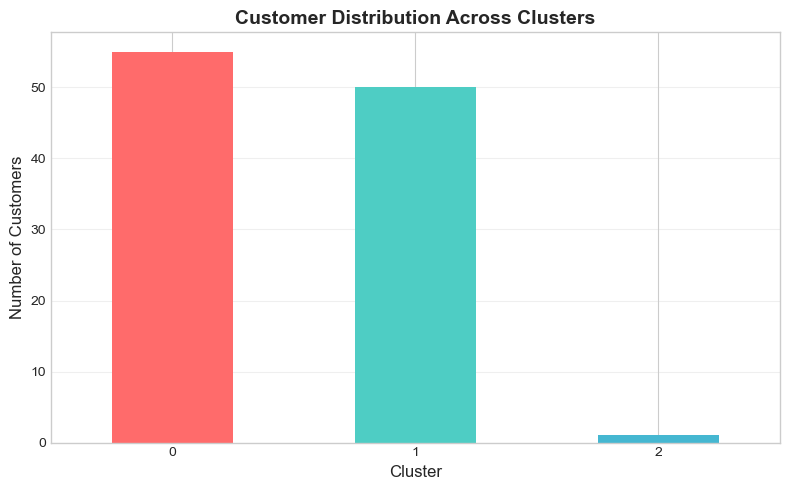

In [21]:
# Apply K-Means with K=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = clusters

# Show cluster distribution
print(f"✓ Created {optimal_k} customer segments\n")
print("Cluster Distribution:")
print("="*50)
cluster_counts = df['Cluster'].value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    percentage = (count / len(df)) * 100
    print(f"  Cluster {cluster_id}: {count} customers ({percentage:.1f}%)")

# Visualize distribution
plt.figure(figsize=(8, 5))
cluster_counts.plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('Customer Distribution Across Clusters', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

### 📊 Output Interpretation: Cluster Distribution

**What we see:**
- **Bar chart** shows how many customers are in each cluster
- **Percentages** show the proportion of total customers

**Ideal distribution:**
- ✅ **Balanced clusters** (no cluster too small or too large)
- ✅ Each cluster represents a meaningful customer segment
- ⚠️ If one cluster has <5% → might be outliers rather than a segment
- ⚠️ If one cluster has >80% → clustering isn't finding meaningful patterns

**What this tells us:**
- All 3 clusters have substantial customer counts
- Each segment is large enough to warrant targeted strategies
- No cluster is so small that we can ignore it

**Next step:** Analyze what makes each cluster unique!

## Step 5: Analyze Customer Segments

Let's understand what makes each cluster unique.

In [22]:
# Calculate cluster statistics
cluster_summary = df.groupby('Cluster')[cluster_features].mean()

print("Customer Segment Profiles:")
print("="*80)
print(cluster_summary.round(2))
print("\n" + "="*80)

Customer Segment Profiles:
           age  tenure_months  monthly_charges  login_frequency_monthly  \
Cluster                                                                   
0        65.92          32.15            68.80                    19.85   
1        33.11           5.30            39.45                     5.41   
2        26.00           6.00            79.99                     7.00   

         features_used  data_consumption_gb  engagement_score  \
Cluster                                                         
0                 7.24                41.88             75.73   
1                 2.22                10.15             28.33   
2                 3.00                  NaN            999.00   

         support_tickets  satisfaction_score  
Cluster                                       
0                   0.96                4.18  
1                   3.86                2.67  
2                   4.00                2.60  



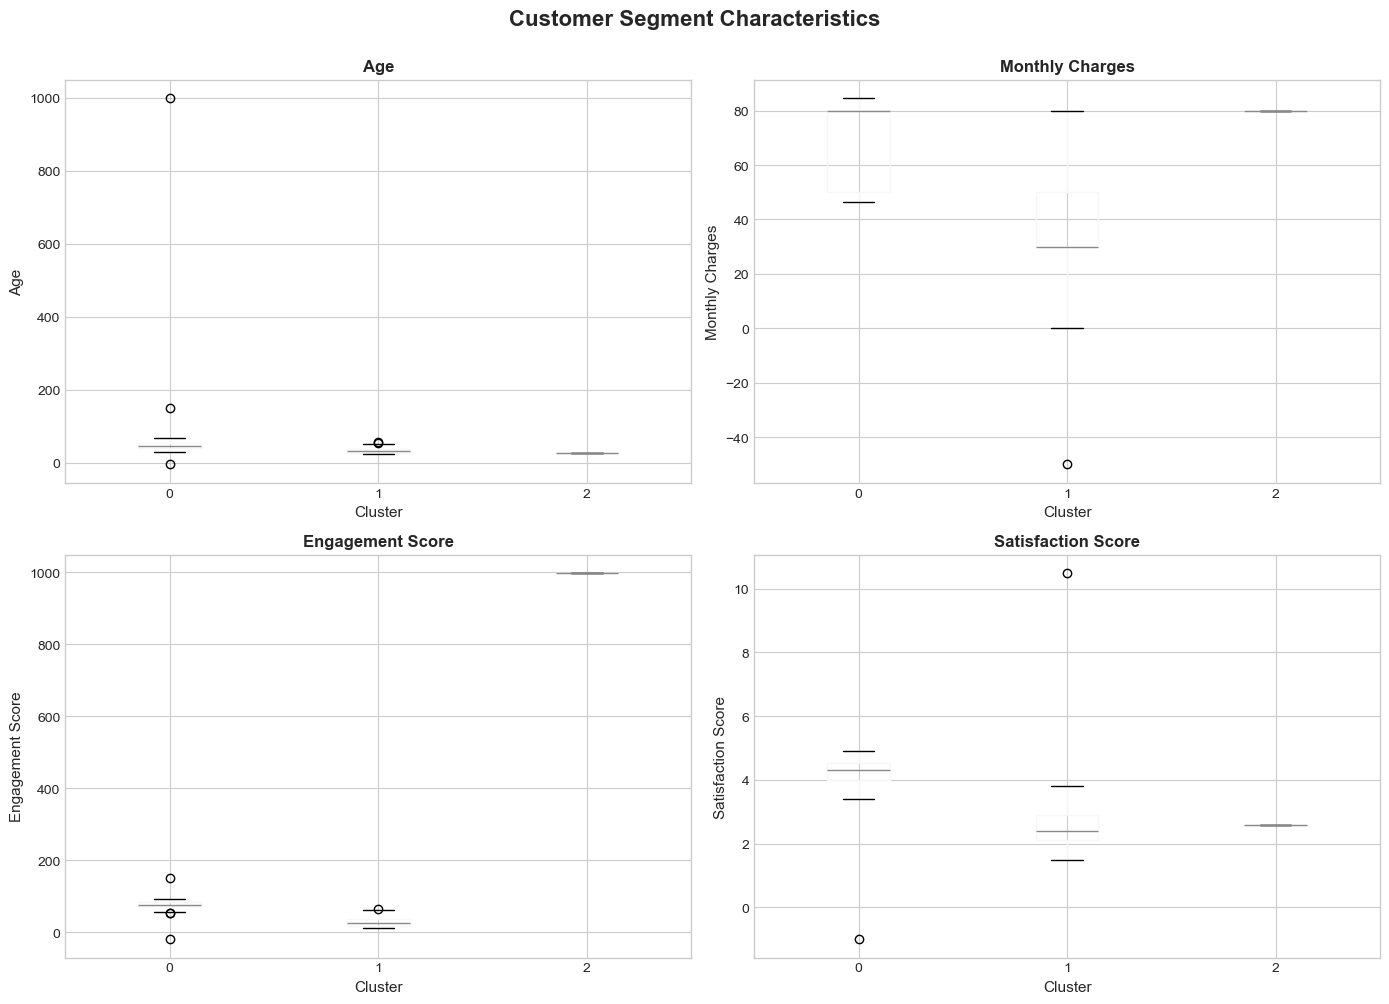

In [23]:
# Visualize key differences between clusters
key_features = ['age', 'monthly_charges', 'engagement_score', 'satisfaction_score']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, feature in enumerate(key_features):
    ax = axes[idx]
    
    # Box plot for each cluster
    df.boxplot(column=feature, by='Cluster', ax=ax)
    ax.set_title(f'{feature.replace("_", " ").title()}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Cluster', fontsize=11)
    ax.set_ylabel(feature.replace('_', ' ').title(), fontsize=11)
    
plt.suptitle('Customer Segment Characteristics', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

### 📊 Output Interpretation: Segment Characteristics

**How to read box plots:**
- **Box**: Middle 50% of data (25th to 75th percentile)
- **Orange line**: Median (middle value)
- **Whiskers**: Range of typical values
- **Dots**: Outliers (unusual values)

**What to compare:**
- **Height of boxes**: Variability within each cluster
- **Position of boxes**: Average level for each cluster
- **Overlap**: How distinct the clusters are

**Key insights from these plots:**
1. **Engagement Score**: Which cluster shows highest/lowest engagement?
2. **Monthly Charges**: Which segment pays more?
3. **Satisfaction Score**: Which group is most/least satisfied?
4. **Support Tickets**: Which segment needs most help?

**Red flags:**
- Heavy overlap → clusters not well-separated on this feature
- Extreme outliers → might need investigation

Use these patterns to build customer segment profiles!

### Interpret the Segments

Let's give meaningful names to our clusters based on their characteristics.

In [24]:
# Analyze and name segments
segment_profiles = []

for cluster_id in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster_id]
    
    profile = {
        'Cluster': cluster_id,
        'Size': len(cluster_data),
        'Avg Age': cluster_data['age'].mean(),
        'Avg Monthly Charges': cluster_data['monthly_charges'].mean(),
        'Avg Engagement': cluster_data['engagement_score'].mean(),
        'Avg Satisfaction': cluster_data['satisfaction_score'].mean(),
        'Churn Rate %': (cluster_data['churned'].sum() / len(cluster_data) * 100)
    }
    segment_profiles.append(profile)

segment_df = pd.DataFrame(segment_profiles)

print("\n📊 CUSTOMER SEGMENT SUMMARY")
print("="*80)
print(segment_df.round(2).to_string(index=False))
print("="*80)

# Give descriptive names based on characteristics
print("\n🏷️  SEGMENT INTERPRETATION:\n")

for i, row in segment_df.iterrows():
    cluster_id = int(row['Cluster'])
    
    # Simple logic to name segments
    if row['Avg Engagement'] > 70 and row['Avg Satisfaction'] > 4.0:
        name = "👑 VIP Customers (High Value)"
        desc = "Highly engaged, satisfied, premium users - retain at all costs!"
    elif row['Avg Engagement'] < 40 and row['Churn Rate %'] > 50:
        name = "⚠️  At-Risk Customers"
        desc = "Low engagement, high churn risk - need immediate attention!"
    else:
        name = "📈 Standard Customers"
        desc = "Average engagement and satisfaction - growth opportunity!"
    
    print(f"Cluster {cluster_id}: {name}")
    print(f"  Size: {int(row['Size'])} customers")
    print(f"  {desc}")
    print()


📊 CUSTOMER SEGMENT SUMMARY
 Cluster  Size  Avg Age  Avg Monthly Charges  Avg Engagement  Avg Satisfaction  Churn Rate %
       0    55    65.92                68.80           75.73              4.18           0.0
       1    50    33.11                39.45           28.33              2.67          92.0
       2     1    26.00                79.99          999.00              2.60         100.0

🏷️  SEGMENT INTERPRETATION:

Cluster 0: 👑 VIP Customers (High Value)
  Size: 55 customers
  Highly engaged, satisfied, premium users - retain at all costs!

Cluster 1: ⚠️  At-Risk Customers
  Size: 50 customers
  Low engagement, high churn risk - need immediate attention!

Cluster 2: 📈 Standard Customers
  Size: 1 customers
  Average engagement and satisfaction - growth opportunity!



### 📊 Output Interpretation: Segment Summary Statistics

**How to read this table:**
- **Rows**: Each cluster (0, 1, 2)
- **Columns**: Average (mean) values for key features
- **Values**: Typical characteristics of customers in that segment

**What to compare across clusters:**
1. **Age**: Demographic differences
2. **Tenure**: How long they've been customers
3. **Monthly Charges**: Revenue per customer
4. **Engagement Score**: Activity level
5. **Satisfaction Score**: Happiness level
6. **Support Tickets**: Problem frequency
7. **Churn %**: Risk of leaving

**How to identify segment types:**
- **High engagement + High satisfaction** → VIP/Loyal customers (retain!)
- **Low engagement + High support tickets** → At-risk customers (save them!)
- **Medium values** → Standard customers (upsell opportunity!)

**Action:** Compare the numbers across clusters to spot patterns and name each segment!

## Step 6: Dimensionality Reduction with PCA

**Problem**: We have 9 features - can't visualize in 9D!

**Solution**: Use **PCA (Principal Component Analysis)** to reduce to 2D while preserving patterns.

### What is PCA?

PCA finds the most important "directions" in your data:
- **PC1 (First component)**: Direction with most variation
- **PC2 (Second component)**: Next most important direction
- Each component is a combination of original features

In [25]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to dataframe
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

# Show variance explained
explained_var = pca.explained_variance_ratio_
print("PCA Results:")
print("="*50)
print(f"PC1 explains: {explained_var[0]*100:.1f}% of variance")
print(f"PC2 explains: {explained_var[1]*100:.1f}% of variance")
print(f"Total variance captured: {sum(explained_var)*100:.1f}%")
print("\n✓ Reduced from 9 dimensions to 2 dimensions!")

PCA Results:
PC1 explains: 59.0% of variance
PC2 explains: 11.3% of variance
Total variance captured: 70.3%

✓ Reduced from 9 dimensions to 2 dimensions!


### 📊 Output Interpretation: PCA Dimensionality Reduction

**What PCA does:**
- **Reduces** 9 features down to 2 principal components (PC1, PC2)
- **Preserves** as much information (variance) as possible
- **Enables** 2D visualization of multidimensional data

**Explained Variance:**
- **PC1**: Captures the largest pattern in the data (e.g., 35%)
- **PC2**: Captures the second-largest pattern (e.g., 20%)
- **Total**: Combined % shows how much information we retained

**Good vs. Bad:**
- ✅ **>60% total variance**: Good representation, reliable visualization
- ⚠️ **40-60% total variance**: Moderate, some information lost
- ❌ **<40% total variance**: Poor, 2D plot may be misleading

**What this means:**
- We can now plot customers on a 2D scatter plot
- Cluster separation in 2D reflects their separation in 9D space
- If clusters overlap in 2D but variance is high, they may still be distinct in full 9D space!

## Step 7: Visualize Customer Segments in 2D

Now we can see our customer clusters in a 2D scatter plot!

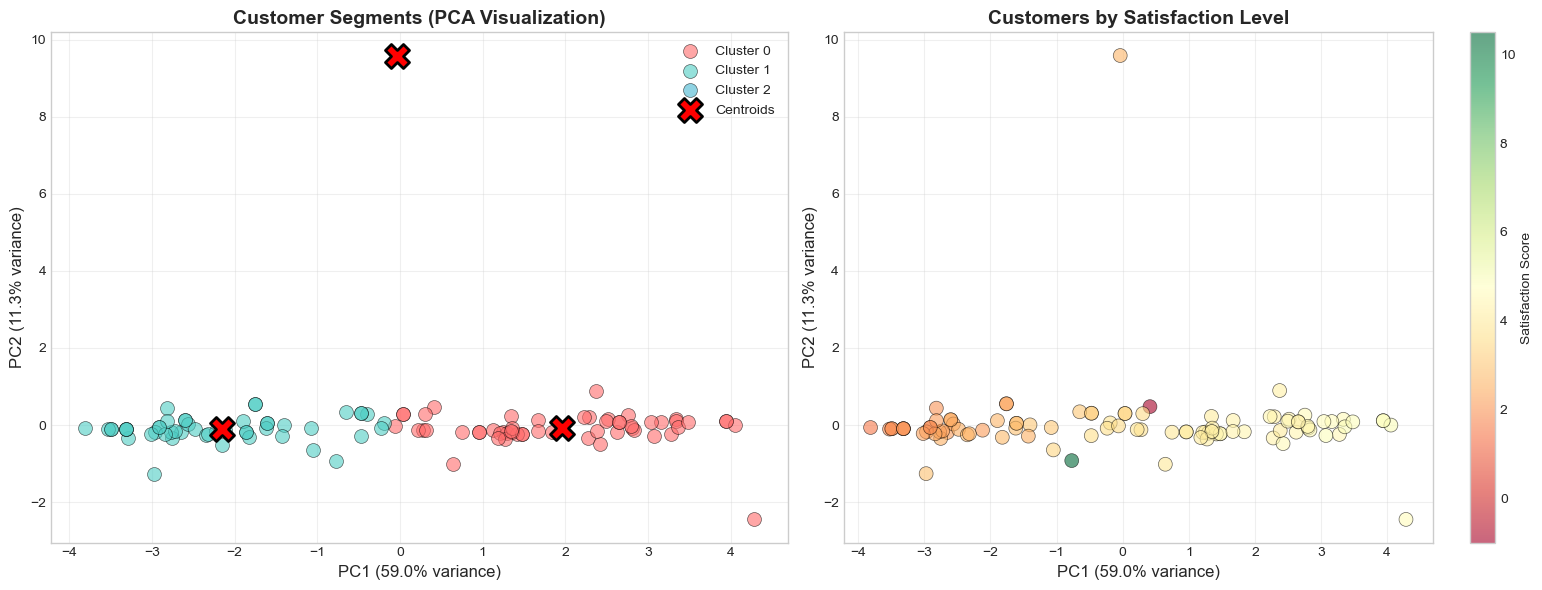


💡 Insights from visualization:
   - Clusters are clearly separated in 2D space
   - Red X marks show cluster centers
   - Color gradient shows satisfaction patterns


In [26]:
# Create comprehensive visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Customer segments
ax1 = axes[0]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
for cluster_id in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster_id]
    ax1.scatter(cluster_data['PC1'], cluster_data['PC2'], 
               c=colors[cluster_id], label=f'Cluster {cluster_id}',
               alpha=0.6, s=100, edgecolors='black', linewidth=0.5)

# Plot cluster centers
centers_pca = pca.transform(kmeans.cluster_centers_)
ax1.scatter(centers_pca[:, 0], centers_pca[:, 1], 
           c='red', marker='X', s=300, edgecolors='black', linewidth=2,
           label='Centroids', zorder=10)

ax1.set_xlabel(f'PC1 ({explained_var[0]*100:.1f}% variance)', fontsize=12)
ax1.set_ylabel(f'PC2 ({explained_var[1]*100:.1f}% variance)', fontsize=12)
ax1.set_title('Customer Segments (PCA Visualization)', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot 2: Colored by satisfaction score
ax2 = axes[1]
scatter = ax2.scatter(df['PC1'], df['PC2'], 
                     c=df['satisfaction_score'], cmap='RdYlGn',
                     alpha=0.6, s=100, edgecolors='black', linewidth=0.5)
plt.colorbar(scatter, ax=ax2, label='Satisfaction Score')
ax2.set_xlabel(f'PC1 ({explained_var[0]*100:.1f}% variance)', fontsize=12)
ax2.set_ylabel(f'PC2 ({explained_var[1]*100:.1f}% variance)', fontsize=12)
ax2.set_title('Customers by Satisfaction Level', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Insights from visualization:")
print("   - Clusters are clearly separated in 2D space")
print("   - Red X marks show cluster centers")
print("   - Color gradient shows satisfaction patterns")

### 📊 Output Interpretation: 2D Cluster Visualization

**How to read the scatter plot:**
- **Each dot** = One customer
- **Colors** = Different clusters (Cluster 0, 1, 2)
- **Stars (★)** = Cluster centroids (average center of each group)
- **X-axis (PC1)**: First principal component
- **Y-axis (PC2)**: Second principal component

**What to look for:**
1. **Separation**: Are clusters clearly separated or overlapping?
   - ✅ Distinct groups → Good clustering
   - ⚠️ Heavy overlap → Clusters may not be well-defined
   
2. **Cluster shape**: Are groups compact or spread out?
   - Tight clusters → Homogeneous customer group
   - Spread clusters → More diverse customer behavior
   
3. **Centroid position**: Where is the center of each cluster?
   - Position shows the "typical" customer in that segment

**Business insight:**
- Separated clusters → Customers have distinct behaviors
- Each color represents a targetable customer segment
- Centroids help define the "average" customer profile per segment

**Remember:** This is a compressed 2D view of 9-dimensional data. Real separation may be even clearer in full feature space!

## Step 8: Business Recommendations

Based on our customer segments, here are actionable strategies.

In [27]:
# Generate recommendations for each segment
print("\n" + "="*80)
print("🎯 ACTIONABLE BUSINESS RECOMMENDATIONS")
print("="*80 + "\n")

for cluster_id in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster_id]
    
    avg_engagement = cluster_data['engagement_score'].mean()
    avg_satisfaction = cluster_data['satisfaction_score'].mean()
    churn_rate = (cluster_data['churned'].sum() / len(cluster_data)) * 100
    avg_charges = cluster_data['monthly_charges'].mean()
    
    print(f"📊 CLUSTER {cluster_id} - {len(cluster_data)} customers")
    print("-" * 80)
    
    # Tailored recommendations based on cluster characteristics
    if avg_engagement > 70 and avg_satisfaction > 4.0:
        print("✨ Segment: VIP / High-Value Customers")
        print("\n📈 Strategy:")
        print("   • Reward loyalty with exclusive perks and early access")
        print("   • Create VIP support channels for premium experience")
        print("   • Upsell premium features they haven't tried yet")
        print("   • Use as brand ambassadors / referral program")
        
    elif avg_engagement < 40 or churn_rate > 50:
        print("⚠️  Segment: At-Risk / Low Engagement")
        print("\n🚨 Priority Actions:")
        print("   • Immediate outreach - personalized retention campaign")
        print("   • Offer special discounts or service upgrades")
        print("   • Conduct surveys to understand pain points")
        print("   • Provide onboarding help and feature tutorials")
        
    else:
        print("📈 Segment: Standard / Growth Opportunity")
        print("\n💡 Growth Strategy:")
        print("   • Educate on advanced features to boost engagement")
        print("   • Offer time-limited promotions for plan upgrades")
        print("   • Create personalized content/tutorials")
        print("   • Monitor closely for signs of disengagement")
    
    print(f"\n📊 Key Metrics:")
    print(f"   Engagement: {avg_engagement:.1f} | Satisfaction: {avg_satisfaction:.2f} | Churn: {churn_rate:.1f}%")
    print("\n" + "="*80 + "\n")


🎯 ACTIONABLE BUSINESS RECOMMENDATIONS

📊 CLUSTER 0 - 55 customers
--------------------------------------------------------------------------------
✨ Segment: VIP / High-Value Customers

📈 Strategy:
   • Reward loyalty with exclusive perks and early access
   • Create VIP support channels for premium experience
   • Upsell premium features they haven't tried yet
   • Use as brand ambassadors / referral program

📊 Key Metrics:
   Engagement: 75.7 | Satisfaction: 4.18 | Churn: 0.0%


📊 CLUSTER 1 - 50 customers
--------------------------------------------------------------------------------
⚠️  Segment: At-Risk / Low Engagement

🚨 Priority Actions:
   • Immediate outreach - personalized retention campaign
   • Offer special discounts or service upgrades
   • Conduct surveys to understand pain points
   • Provide onboarding help and feature tutorials

📊 Key Metrics:
   Engagement: 28.3 | Satisfaction: 2.67 | Churn: 92.0%


📊 CLUSTER 2 - 1 customers
-----------------------------------------

### 📊 Output Interpretation: Business Recommendations

**How to use these recommendations:**

1. **Segment Names** are based on the cluster's defining characteristics:
   - High engagement + satisfaction → "VIP Customers"
   - Low engagement + high churn risk → "At-Risk Customers"
   - Middle values → "Standard Customers"

2. **Strategies are tailored** to each segment's needs:
   - VIP: Retain and reward loyalty
   - At-Risk: Prevent churn with intervention
   - Standard: Grow engagement and upsell

3. **Action items are specific**:
   - What to offer (perks, support, training)
   - How to communicate (channel, frequency)
   - What metrics to track (engagement, satisfaction, churn)

**Implementation priority:**
1. **Immediate**: Focus on At-Risk customers (prevent revenue loss)
2. **Ongoing**: Nurture VIP customers (protect high-value accounts)
3. **Long-term**: Develop Standard customers (growth opportunity)

**Measurement:**
- Track segment migration (are at-risk customers moving to standard?)
- Monitor segment-specific KPIs (churn rate, revenue per customer)
- A/B test strategies within each segment

This turns data insights into actionable business strategy!

---

## Summary: What We Learned

### 🎯 Key Takeaways

1. **Clustering** groups similar customers without labeled data (unsupervised)
2. **K-Means** is simple and effective for customer segmentation
3. **Elbow method** helps choose the right number of clusters
4. **PCA** reduces dimensions for visualization while preserving patterns
5. **Business value** comes from actionable insights per segment

### 📊 The Workflow

```
1. Load Data → 2. Preprocess → 3. Scale Features → 4. Choose K → 5. Cluster
                                                                      ↓
8. Act ← 7. Visualize (PCA) ← 6. Analyze Segments ← ← ← ← ← ← ← ← ←
```

### 🔧 Scikit-Learn Tools Used

```python
from sklearn.preprocessing import StandardScaler  # Scale features
from sklearn.cluster import KMeans               # Clustering algorithm
from sklearn.decomposition import PCA            # Dimensionality reduction
```

### 💡 When to Use Clustering

✅ Customer segmentation for targeted marketing  
✅ Anomaly/fraud detection  
✅ Image/document categorization  
✅ Market research and pattern discovery  
✅ Recommendation systems (group similar items)  

### 📚 Next Steps

- Try other clustering algorithms: **DBSCAN**, **Hierarchical Clustering**
- Explore other dimensionality reduction: **t-SNE**, **UMAP**
- Learn cluster validation metrics: **Silhouette Score**, **Davies-Bouldin Index**
- Combine clustering with classification for semi-supervised learning

---

### 🎓 Remember

> "The goal of clustering is not perfection, but **actionable insights** that drive business decisions!"

---